# Convolutional Neural Network Architecture

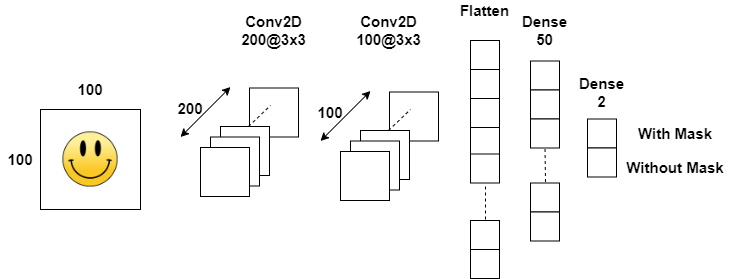

In [4]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [10]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 48s 2s/step - loss: 0.6765 - accuracy: 0.5323 - val_loss: 0.6461 - val_accuracy: 0.8508
Epoch 2/20
31/31 [==============================] - 47s 2s/step - loss: 0.6109 - accuracy: 0.6737 - val_loss: 0.5460 - val_accuracy: 0.8185
Epoch 3/20
31/31 [==============================] - 48s 2s/step - loss: 0.5550 - accuracy: 0.7414 - val_loss: 0.5019 - val_accuracy: 0.8589
Epoch 4/20
31/31 [==============================] - 49s 2s/step - loss: 0.4970 - accuracy: 0.8192 - val_loss: 0.4440 - val_accuracy: 0.9355
Epoch 5/20
31/31 [==============================] - 48s 2s/step - loss: 0.4429 - accuracy: 0.8758 - val_loss: 0.4226 - val_accuracy: 0.9395
Epoch 6/20
31/31 [==============================] - 48s 2s/step - loss: 0.4023 - accuracy: 0.9182 - val_loss: 0.3908 - val_accuracy: 0.9395
Epoch 7/20
31/31 [==============================] - 48s 2s/step - loss: 0.3889 - accuracy: 0.9091 - val_loss: 0.3442 - val_accuracy: 0.9597
Epoch 8/20
31/31 [==

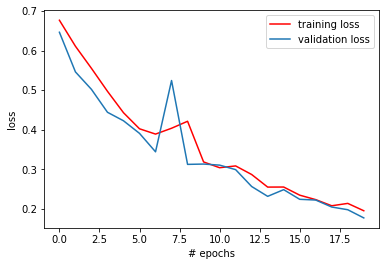

In [11]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

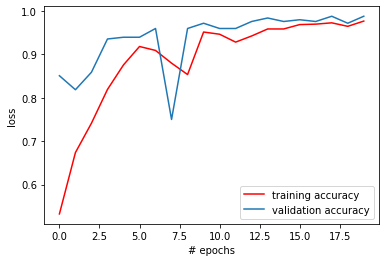

In [12]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 201ms/step - loss: 0.2612 - accuracy: 0.9783
[0.26121798157691956, 0.97826087474823]
